In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
clean_df = pd.read_csv('cleaner_doordash_data.csv')
clean_df

,Unnamed: 0,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,distance,loc_name,loc_number,url,address,cuisines,delivery_time,review_count,review_rating,cuisines split
0,2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,1.594482,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,29,1364,4.8,"['Vietnamese', 'Bubble Tea', 'Smoothies', 'San..."
1,5,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.672978,-73.950462,0.404577,Taqueria Milear,133345,https://www.doordash.com/store/133345/?pickup=...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Tacos|Burritos|Dessert|Brunch,28,2000,4.6,"['Mexican', 'Tacos', 'Burritos', 'Dessert', 'B..."
2,8,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.674537,-73.950007,0.298770,Cielito Lindo,328460,https://www.doordash.com/store/328460/?pickup=...,"665 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Breakfast|Burritos|Salads|Soup,25,163,4.7,"['Mexican', 'Breakfast', 'Burritos', 'Salads',..."
3,11,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.680930,-73.977140,1.394092,Artichoke Basille's Pizza,48755,https://www.doordash.com/store/48755/?pickup=f...,"59 5th Ave, Brooklyn, NY 11217, USA",Pizza|Pie,42,2000,4.5,"['Pizza', 'Pie']"
4,14,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.668583,-73.980515,1.716376,Five Guys Burgers & Fries,5155,https://www.doordash.com/store/5155/?pickup=false,"284 7th Avenue, Brooklyn, NY 11215, USA",Hot Dogs|Dinner|Fast Food|Burgers,34,2000,4.5,"['Hot Dogs', 'Dinner', 'Fast Food', 'Burgers']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,11214,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.463513,-71.026401,1.847284,Buffalo Wild Wings,882147,https://www.doordash.com/store/882147/?pickup=...,"Buffalo Wild Wings, 180 Main St, Saugus, MA 01...",Dinner|Takeout|Pickup|Lunch|Burgers|Chicken Wi...,40,955,4.0,"['Dinner', 'Takeout', 'Pickup', 'Lunch', 'Burg..."
4069,11215,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.478599,-71.063536,1.472188,Dockside Restaurant,267895,https://www.doordash.com/store/267895/?pickup=...,"Dockside Restaurants, 1099 Main St, Wakefield,...",American|Sandwiches|Burgers|Pizza,51,82,4.1,"['American', 'Sandwiches', 'Burgers', 'Pizza']"
4070,11216,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.460613,-71.027119,1.775243,Pretzelmaker,1256176,https://www.doordash.com/store/1256176/?pickup...,"1201 Broadway, Saugus, MA 01906, USA",Beverages|Pretzels|Smoothies,32,110,4.5,"['Beverages', 'Pretzels', 'Smoothies']"
4071,11217,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.463535,-71.026164,1.859393,Wild Burger,2360386,https://www.doordash.com/store/2360386/?pickup...,"180 Main St, Saugus, MA 01906, USA",American|Burgers|Sandwiches,34,23,3.7,"['American', 'Burgers', 'Sandwiches']"


In [8]:
# create separate dfs for each of the metros
NY_df = clean_df.loc[clean_df["searched_metro"]=="NY"]
LA_df = clean_df.loc[clean_df["searched_metro"]=="LA"]
CH_df = clean_df.loc[clean_df["searched_metro"]=="CH"]
BO_df = clean_df.loc[clean_df["searched_metro"]=="BO"]

In [20]:
# run correlation tests for each metro
NY_result = st.linregress(NY_df["delivery_time"], NY_df["review_rating"])
LA_result = st.linregress(LA_df["delivery_time"], LA_df["review_rating"])
CH_result = st.linregress(CH_df["delivery_time"], CH_df["review_rating"])
BO_result = st.linregress(BO_df["delivery_time"], BO_df["review_rating"])

# store result values for each metro
NY_values = NY_df["delivery_time"]*NY_result.slope + NY_result.intercept
LA_values = LA_df["delivery_time"]*LA_result.slope + LA_result.intercept
CH_values = CH_df["delivery_time"]*CH_result.slope + CH_result.intercept
BO_values = BO_df["delivery_time"]*BO_result.slope + BO_result.intercept

# create line equations for each metro
NY_line_eq = "y = " + str(round(NY_result.slope,2)) + "x + " + str(round(NY_result.intercept,2))
LA_line_eq = "y = " + str(round(LA_result.slope,2)) + "x + " + str(round(LA_result.intercept,2))
CH_line_eq = "y = " + str(round(CH_result.slope,2)) + "x + " + str(round(CH_result.intercept,2))
BO_line_eq = "y = " + str(round(BO_result.slope,2)) + "x + " + str(round(BO_result.intercept,2))

print(NY_result)
print(LA_result)
print(CH_result)
print(BO_result)

LinregressResult(slope=-0.00044359910520060314, intercept=3.7962217852369813, rvalue=-0.13783978242985034, pvalue=2.5434502353894656e-08, stderr=7.924308425961137e-05, intercept_stderr=0.041177009140838716)
LinregressResult(slope=-0.0011567535896985523, intercept=4.0676265318481635, rvalue=-0.005748267088083483, pvalue=0.8651718564080293, stderr=0.006810666581815943, intercept_stderr=0.23368553014880294)
LinregressResult(slope=-0.008510448142316034, intercept=4.345340468996042, rvalue=-0.06472753880977407, pvalue=0.0595527908213476, stderr=0.00451093398405661, intercept_stderr=0.19132077196048833)
LinregressResult(slope=0.010160329958264372, intercept=3.8495137090245266, rvalue=0.09569144111154958, pvalue=0.009683009124387989, stderr=0.003917161545728623, intercept_stderr=0.156978701993555)


In [15]:
# see if there is a correlation with all of the metros combined
delivery_time = clean_df["delivery_time"]
rating = clean_df["review_rating"]
correlation_result = st.linregress(delivery_time, rating)
regress_values = delivery_time * correlation_result.slope + correlation_result.intercept
line_eq = "y = " + str(round(correlation_result.slope,2)) + "x + " + str(round(correlation_result.intercept,2))
print(correlation_result)

LinregressResult(slope=-0.00047097141000669357, intercept=3.979465075361984, rvalue=-0.10119196606191999, pvalue=9.62574155732796e-11, stderr=7.257097355133256e-05, intercept_stderr=0.023883581791890488)


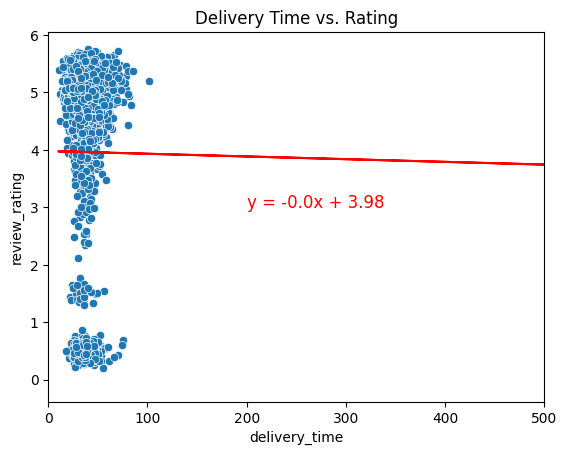

In [21]:
# plot for delivery time vs. rating for metros combined
def jitter(values,n):
    return values + np.random.normal(n,0.1,values.shape)

sns.scatterplot(x=jitter(delivery_time, 0.5), y=jitter(rating, 0.5))
plt.plot(delivery_time,regress_values,"r-")
plt.annotate(line_eq,(200, 3),fontsize=12,color="red")

# set x axis limit to 500 to exclude some outliers
plt.xlim(0,500)

plt.title("Delivery Time vs. Rating")
plt.savefig("outputs/scatterplot_output.jpg")